In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import linear_model
import random

In [2]:
df = pd.read_csv('auto-mpg.data',header=None, delimiter=r"\s+")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
# Load MPG and acceleration
model = pd.DataFrame(df, columns = [0, 5])
model[:5]

,0,5
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [5]:
train_split = 0.8
df_X_train = []
df_X_test = []
df_Y_train = []
df_Y_test = []

for i in range(len(model)):
    if random.random() <= train_split:
        df_X_train.append(model[5][i])
        df_Y_train.append(model[0][i])
    else:
        df_X_test.append(model[5][i])
        df_Y_test.append(model[0][i])

In [6]:
regr = linear_model.LinearRegression()

In [7]:
df_X_train = np.array(pd.DataFrame(df_X_train))
df_Y_train = np.array(pd.DataFrame(df_Y_train))
df_X_test = np.array(pd.DataFrame(df_X_test))
df_Y_test = np.array(pd.DataFrame(df_Y_test))
df_X_train = np.array(np.array(df_X_train))

print(df_X_train.shape, df_Y_train.shape, df_X_test.shape, df_Y_test.shape)

(311, 1) (311, 1) (87, 1) (87, 1)


In [8]:
df_X_train = df_X_train.reshape(len(df_X_train),1)
df_Y_train = df_Y_train.reshape(len(df_Y_train),1)
df_X_test = df_X_test.reshape(len(df_X_test),1)
df_Y_test = df_Y_test.reshape(len(df_Y_test),1)
print(df_X_train.shape, df_Y_train.shape, df_X_test.shape, df_Y_test.shape)

(311, 1) (311, 1) (87, 1) (87, 1)


In [9]:
regr.fit(df_X_train,df_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print("Coefficients:", regr.coef_, " Intercept: ", regr.intercept_)

Coefficients: [[ 1.17084487]]  Intercept:  [ 5.34834962]


In [11]:
predict_outcome = regr.predict(df_X_test)

In [12]:
for i in range(len(df_X_test)):
    print("X_test: ", df_X_test[i], " Y_test_actual: ",  df_Y_test[i], " Y_test_predicted: ",  predict_outcome[i])

X_test:  [ 11.5]  Y_test_actual:  [ 15.]  Y_test_predicted:  [ 18.81306564]
X_test:  [ 9.]  Y_test_actual:  [ 14.]  Y_test_predicted:  [ 15.88595346]
X_test:  [ 12.5]  Y_test_actual:  [ 26.]  Y_test_predicted:  [ 19.98391051]
X_test:  [ 14.]  Y_test_actual:  [ 25.]  Y_test_predicted:  [ 21.74017781]
X_test:  [ 15.5]  Y_test_actual:  [ 16.]  Y_test_predicted:  [ 23.49644512]
X_test:  [ 12.]  Y_test_actual:  [ 14.]  Y_test_predicted:  [ 19.39848807]
X_test:  [ 13.5]  Y_test_actual:  [ 14.]  Y_test_predicted:  [ 21.15475538]
X_test:  [ 13.5]  Y_test_actual:  [ 18.]  Y_test_predicted:  [ 21.15475538]
X_test:  [ 14.5]  Y_test_actual:  [ 30.]  Y_test_predicted:  [ 22.32560025]
X_test:  [ 19.]  Y_test_actual:  [ 27.]  Y_test_predicted:  [ 27.59440217]
X_test:  [ 20.5]  Y_test_actual:  [ 26.]  Y_test_predicted:  [ 29.35066947]
X_test:  [ 13.]  Y_test_actual:  [ 14.]  Y_test_predicted:  [ 20.56933294]
X_test:  [ 11.5]  Y_test_actual:  [ 17.]  Y_test_predicted:  [ 18.81306564]
X_test:  [ 14.5]  

In [13]:
MSE = np.mean((predict_outcome - df_Y_test) ** 2)
print("Mean squared error:", MSE)

Mean squared error: 46.1135284635


In [14]:
VAR = regr.score(df_X_test, df_Y_test)
print('Variance score:', VAR)

Variance score: 0.179508838926


In [15]:
df_X_test.shape,df_X_train.shape,df_Y_train.shape,df_Y_test.shape

((87, 1), (311, 1), (311, 1), (87, 1))

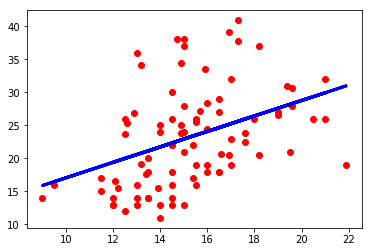

In [16]:
plt.scatter(df_X_test, df_Y_test, color='red')
plt.plot(df_X_test, predict_outcome, color='blue', linewidth=3)